In [11]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import sys

In [4]:
def get_params():

    yield "Gaussian Naive Bayes", GaussianNB()

    yield "K Nearest Neighbor", KNeighborsClassifier()

    yield "Linear SVC", LinearSVC()

    yield "Decision Tree", DecisionTreeClassifier()

    yield "Random Forest", RandomForestClassifier()


def print_scores(title, cm, acc, file=sys.stdout):

    print("{}\n".format(title))
    print("The confusion matrix is: ")
    print(cm)
    print("The sum of the values is {}".format(np.sum(cm)))
    print("The accuracy score: {}\n".format(acc))


def get_scores(X, y, *, clf):
    """ """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    y_pred = cross_val_predict(estimator=clf, X=X, y=y, cv=kf)

    cm = confusion_matrix(y, y_pred)
    acc = accuracy_score(y, y_pred)

    return cm, acc



In [6]:
uri = Path("../../res/iris.csv")
out_file = open(Path("../build/compare_model.txt"), "w")

columns = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]

# load dataset
df = pd.read_csv(uri, names=columns)

df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# split dataset into features and class:
# features
X = df.iloc[:, :-1].copy()
# class
y = df.iloc[:, -1].copy()

X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
for title, model in get_params():
    """ """
    cm, acc = get_scores(X=X, y=y, clf=model)
    print_scores(title=title, cm=cm, acc=acc)
    

Gaussian Naive Bayes

The confusion matrix is: 
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
The sum of the values is 150
The accuracy score: 0.96

K Nearest Neighbor

The confusion matrix is: 
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
The sum of the values is 150
The accuracy score: 0.9733333333333334

Linear SVC

The confusion matrix is: 
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
The sum of the values is 150
The accuracy score: 0.9666666666666667

Decision Tree

The confusion matrix is: 
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
The sum of the values is 150
The accuracy score: 0.9533333333333334

Random Forest

The confusion matrix is: 
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
The sum of the values is 150
The accuracy score: 0.96



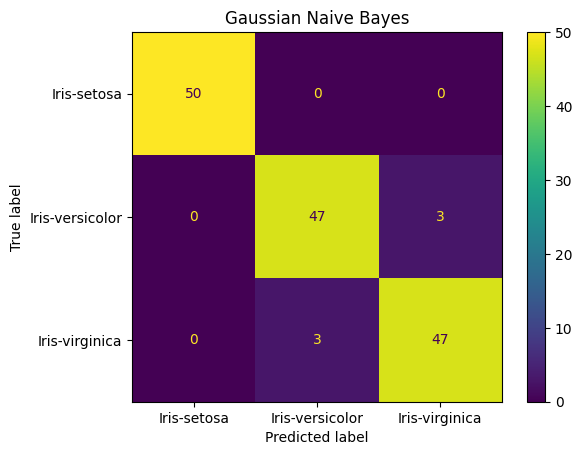

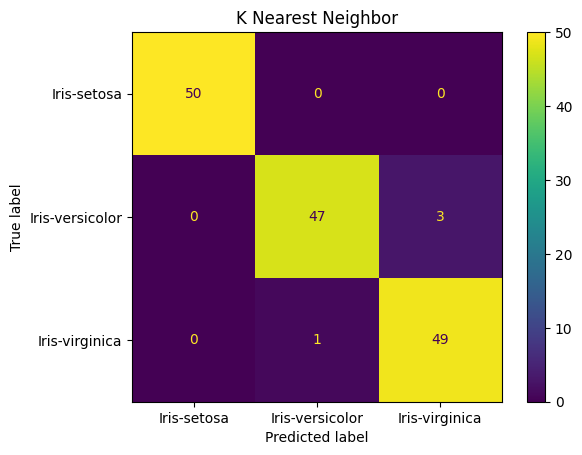

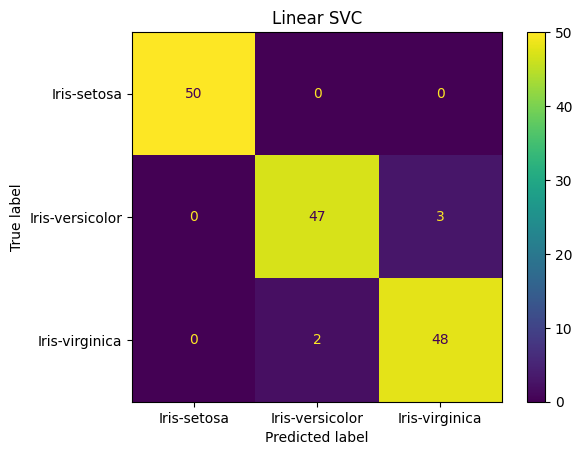

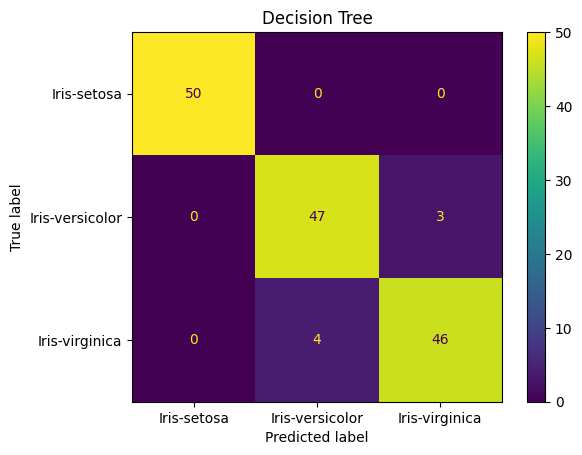

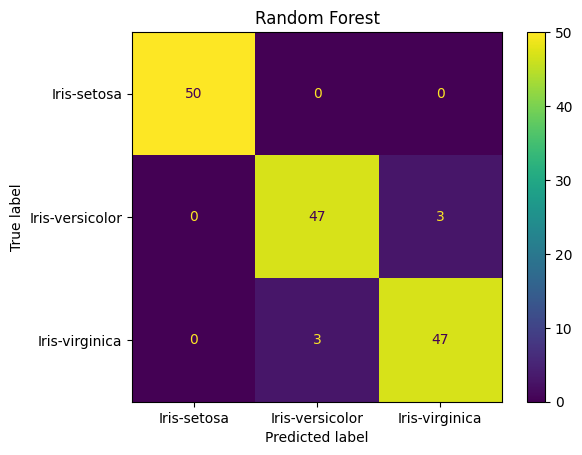

In [15]:
class_names = df['class'].unique()

for title, model in get_params():
    """ """
    cm, acc = get_scores(X=X, y=y, clf=model)
    # print_scores(title=title, cm=cm, acc=acc)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot()
    plt.title(title)
    plt.show()
    print('\n')

In [ ]:
uri = Path("../../res/iris.csv")

columns = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]

# load dataset
df = pd.read_csv(uri, names=columns)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# split dataset into features and class:
# features
X = df.iloc[:, :-1].copy()
# class
y = df.iloc[:, -1].copy()

# kf = KFold(n_splits=5, shuffle=True, randome_state=42)
print(y.describe())
X.head()

count             150
unique              3
top       Iris-setosa
freq               50
Name: class, dtype: object


,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
